# Machine Learning - Clasificador de diabetes
En este proyecto se busca la creación de un modelo de machine learning que clasfique si una persona tiene o no diabetes. Para esto se utilizara una regresión logística donde las variables independientes seran el colesterol, azucar en la sangre, HDL o colesterol bueno, edad, peso, altura, presión arterial, tamaño de la cintura y cadera. Y nuestra variable dependiente sera de caracter dummy y se clasificara en 0 sino tiene diabetes y 1 si tiene diabetes.

Fuente: data.world

### 1. Cargamos las librerias


In [1]:

import pandas as pd # Libreria para tratamiento de DataFrame
import numpy as np # Libreria de algebra lineal
import matplotlib.pyplot as plt # Libreria gráfica
import seaborn as sns # Libreria Gráfica
from sklearn import metrics # Validar nuestro metodo
from sklearn.model_selection import train_test_split # Entrenar y divir la información
from sklearn.linear_model import LogisticRegression # Regresión logistica
from sklearn.tree import DecisionTreeClassifier # Arboles de decisión
from sklearn.ensemble import RandomForestClassifier # Bosques aleatorios
from sklearn.svm import SVC # Máquinas de vectores de soporte

### 2. Cargamos el dataset

In [2]:
# Lectura del dataset
diabetes = pd.read_csv("/work/Diabetes.csv")

In [3]:
# Primeras 5 filas del dataset
diabetes.head()

,Patient number,Cholesterol,Glucose,HDL Chol,Chol/HDL ratio,Age,Gender,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip,Waist/hip ratio,Diabetes
0,1,193,77,49,3.9,19,female,61,119,22.5,118,70,32,38,0.84,No diabetes
1,2,146,79,41,3.6,19,female,60,135,26.4,108,58,33,40,0.83,No diabetes
2,3,217,75,54,4.0,20,female,67,187,29.3,110,72,40,45,0.89,No diabetes
3,4,226,97,70,3.2,20,female,64,114,19.6,122,64,31,39,0.79,No diabetes
4,5,164,91,67,2.4,20,female,70,141,20.2,122,86,32,39,0.82,No diabetes


### 3. Exploración de datos 

In [4]:
# ¿Que columnas tienen los datos?
diabetes.columns

Index(['Patient number', 'Cholesterol', 'Glucose', 'HDL Chol',
       'Chol/HDL ratio', 'Age', 'Gender', 'Height', 'Weight', 'BMI',
       'Systolic BP', 'Diastolic BP', 'waist', 'hip', 'Waist/hip ratio',
       'Diabetes'],
      dtype='object')

In [5]:
# ¿Que tamaño tiene el dataset?
diabetes.shape

(390, 16)

In [6]:
# ¿Hay datos nulos?
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Patient number   390 non-null    int64  
 1   Cholesterol      390 non-null    int64  
 2   Glucose          390 non-null    int64  
 3   HDL Chol         390 non-null    int64  
 4   Chol/HDL ratio   390 non-null    float64
 5   Age              390 non-null    int64  
 6   Gender           390 non-null    object 
 7   Height           390 non-null    int64  
 8   Weight           390 non-null    int64  
 9   BMI              390 non-null    float64
 10  Systolic BP      390 non-null    int64  
 11  Diastolic BP     390 non-null    int64  
 12  waist            390 non-null    int64  
 13  hip              390 non-null    int64  
 14  Waist/hip ratio  390 non-null    float64
 15  Diabetes         390 non-null    object 
dtypes: float64(3), int64(11), object(2)
memory usage: 48.9+ KB


In [7]:
# Como se distribuyen las variables numéricas 
diabetes.describe()

,Patient number,Cholesterol,Glucose,HDL Chol,Chol/HDL ratio,Age,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip,Waist/hip ratio
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,195.500000,207.230769,107.338462,50.266667,4.524615,46.774359,65.951282,177.407692,28.775641,137.133333,83.289744,37.869231,42.992308,0.881385
std,112.727548,44.666005,53.798188,17.279069,1.736634,16.435911,3.918867,40.407824,6.600915,22.859528,13.498192,5.760947,5.664342,0.073212
min,1.000000,78.000000,48.000000,12.000000,1.500000,19.000000,52.000000,99.000000,15.200000,90.000000,48.000000,26.000000,30.000000,0.680000
25%,98.250000,179.000000,81.000000,38.000000,3.200000,34.000000,63.000000,150.250000,24.100000,122.000000,75.000000,33.000000,39.000000,0.830000
50%,195.500000,203.000000,90.000000,46.000000,4.200000,44.500000,66.000000,173.000000,27.800000,136.000000,82.000000,37.000000,42.000000,0.880000
75%,292.750000,229.000000,107.750000,59.000000,5.400000,60.000000,69.000000,200.000000,32.275000,148.000000,90.000000,41.000000,46.000000,0.930000
max,390.000000,443.000000,385.000000,120.000000,19.300000,92.000000,76.000000,325.000000,55.800000,250.000000,124.000000,56.000000,64.000000,1.140000


In [8]:
# ¿Como se comportan las variables categoricas?
diabetes.describe(include=["O"])

,Gender,Diabetes
count,390,390
unique,2,2
top,female,No diabetes
freq,228,330


### 3.1 Procesamiento de datos

In [9]:
# Renombramos algunas columnas
diabetes = diabetes.rename(columns={"Cholesterol":"Colesterol",
                                    "Glucose":"Glucosa",
                                    "HDL Chol": "HDL colesterol",
                                    "Age":"Edad",
                                    "Gender":"Género",
                                    "Height":"Altura",
                                    "Weight":"Peso",
                                    "Systolic BP":"Presión arterial alta",
                                    "Diastolic BP": "Presión arterial baja",
                                    "waist":"Cintura",
                                    "hip":"Cadera"})

In [10]:
# Observamos el cambio de los nombres de las columnas
diabetes.columns

Index(['Patient number', 'Colesterol', 'Glucosa', 'HDL colesterol',
       'Chol/HDL ratio', 'Edad', 'Género', 'Altura', 'Peso', 'BMI',
       'Presión arterial alta', 'Presión arterial baja', 'Cintura', 'Cadera',
       'Waist/hip ratio', 'Diabetes'],
      dtype='object')

In [11]:
# Procedemos a eliminar columnas
diabetes = diabetes.drop(["Patient number",
                          "Chol/HDL ratio",
                          "BMI",
                          "Waist/hip ratio"], axis = 1)

### 3.2 Estudio de la variable diabetes

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


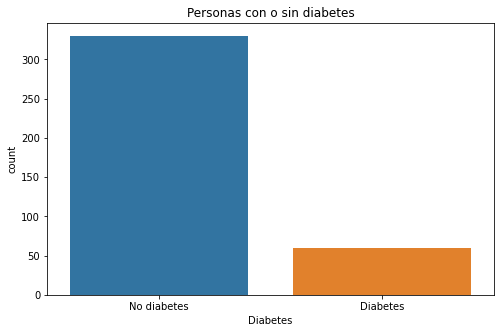

In [12]:
# Gráficamos la variable dependiente
plt.figure(figsize=(8,5))
sns.countplot(diabetes['Diabetes'])
plt.title("Personas con o sin diabetes")
plt.xlabel("Diabetes")
plt.show()

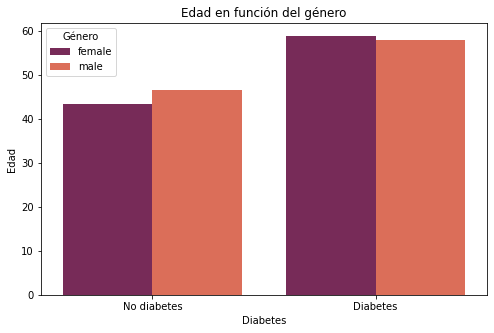

In [13]:
# Edad en función del género
plt.figure(figsize=(8,5))
sns.barplot(data = diabetes, x = "Diabetes", y = "Edad", 
            hue = "Género", palette = "rocket", ci = None)
plt.title("Edad en función del género")
plt.xlabel("Diabetes")
plt.ylabel("Edad")
plt.show()

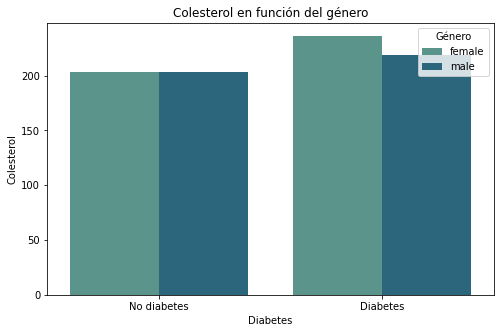

In [14]:
# Colesterol en función del género
plt.figure(figsize=(8,5))
sns.barplot(data = diabetes, x = "Diabetes", y = "Colesterol", 
            hue = "Género", palette = "crest", ci = None)
plt.title("Colesterol en función del género")
plt.xlabel("Diabetes")
plt.ylabel("Colesterol")
plt.show()

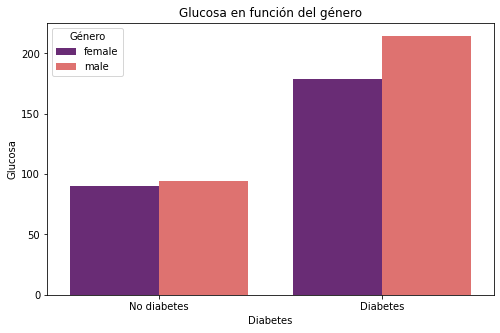

In [15]:
# Glucosa en función del género
plt.figure(figsize=(8,5))
sns.barplot(data = diabetes, x = "Diabetes", y = "Glucosa", 
            hue = "Género", palette = "magma", ci = None)
plt.title("Glucosa en función del género")
plt.xlabel("Diabetes")
plt.ylabel("Glucosa")
plt.show()

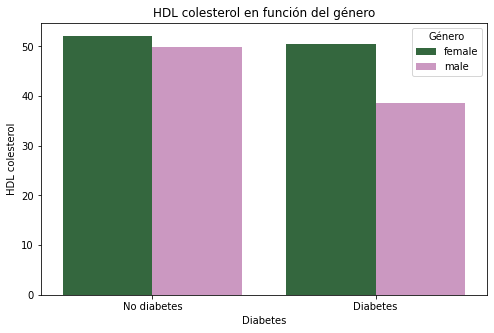

In [16]:
# HDL colesterol en función del género
plt.figure(figsize=(8,5))
sns.barplot(data = diabetes, x = "Diabetes", y = "HDL colesterol", 
            hue = "Género", palette = "cubehelix", ci = None)
plt.title("HDL colesterol en función del género")
plt.xlabel("Diabetes")
plt.ylabel("HDL colesterol")
plt.show()

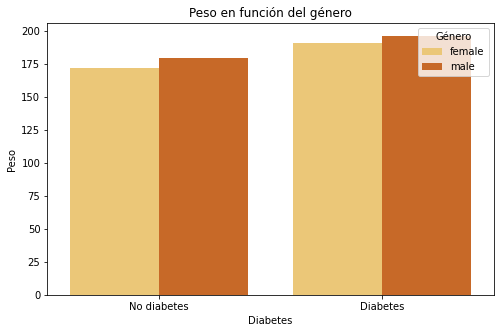

In [17]:
# Peso en función del género
plt.figure(figsize=(8,5))
sns.barplot(data = diabetes, x = "Diabetes", y = "Peso", 
            hue = "Género", palette = "YlOrBr", ci = None)
plt.title("Peso en función del género")
plt.xlabel("Diabetes")
plt.ylabel("Peso")
plt.show()

### 4. Tratamiento de los datos para modelación
A continuación convertimos la variable diabletes en dummy para posteriomente crear el modelo de clasificación.

In [18]:
# Creación de la variable dummy
diabetes["Diabetes"] = diabetes.Diabetes.map({"No diabetes":0,
                                              "Diabetes":1})
diabetes["Género"] = diabetes.Género.map({"female":0,
                                          "male":1})


In [19]:
# Observamos nuevamente la información de nuestras variables
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Colesterol             390 non-null    int64
 1   Glucosa                390 non-null    int64
 2   HDL colesterol         390 non-null    int64
 3   Edad                   390 non-null    int64
 4   Género                 390 non-null    int64
 5   Altura                 390 non-null    int64
 6   Peso                   390 non-null    int64
 7   Presión arterial alta  390 non-null    int64
 8   Presión arterial baja  390 non-null    int64
 9   Cintura                390 non-null    int64
 10  Cadera                 390 non-null    int64
 11  Diabetes               390 non-null    int64
dtypes: int64(12)
memory usage: 36.7 KB


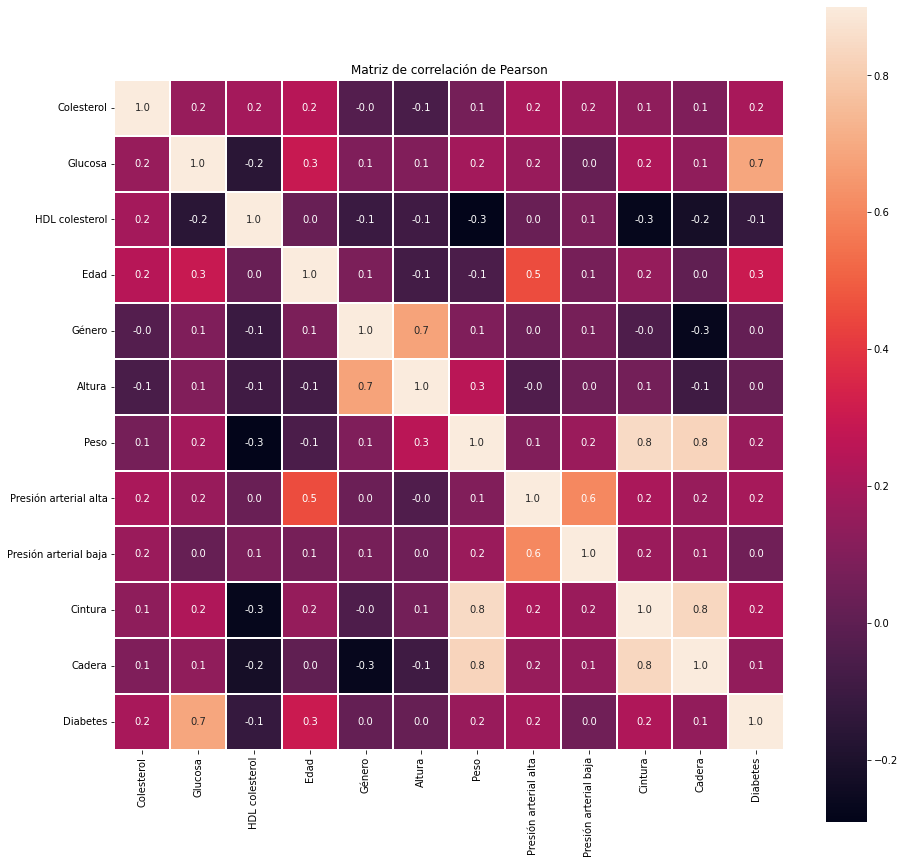

In [21]:
# Gráfica de matriz de correlación
plt.figure(figsize=(15,15))
sns.heatmap(diabetes.corr(),annot=True, linewidths=.3, fmt= '.1f', vmax = 0.9, square= True)
plt.title("Matriz de correlación de Pearson")
plt.show()


### 5. Modelos de clasificación con scikit-learn
En esta sección vamos a crear 4 algoritmos de clasificación con la libreria scikit-learn como lo son arboles de decisión, bosques aleatorios, regresión logística y máquinas de vectores de soporte.

In [22]:
# Creamos nuestra varible dependiente y independientes
X = diabetes.drop(["Diabetes"],axis=1) # Varibles independientes o explicativas
Y = diabetes["Diabetes"] # Variable dependiente en este caso si tiene o no diabetes

In [23]:
# Dividimos nuestros datos
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state= 0)

### 5.1 Arboles de decisión


In [30]:
# Procedemos a aplicar nuestro algoritmo
arbol_decisión = DecisionTreeClassifier(criterion= "entropy")
arbol_decisión.fit(X_train, y_train) # Ejecución del modelo
Y_pred_arbol = arbol_decisión.predict(X_test)

In [31]:
# Creamos la matriz de confusión 
matriz_arbol = metrics.confusion_matrix(y_test, Y_pred_arbol)
matriz_arbol

array([[58,  6],
       [ 4, 10]])

In [32]:
# Exactitud del modelo
print("Exactitud", metrics.accuracy_score(y_test, Y_pred_arbol))

Exactitud 0.8717948717948718


### 5.2 Bosques aleatorios 

In [33]:
# Procedemos a aplicar nuestro algoritmo
bosques_aleatorios = RandomForestClassifier(n_estimators=10, criterion="entropy")
bosques_aleatorios.fit(X_train, y_train) # Ejecución del modelo
Y_pred_bosques = bosques_aleatorios.predict(X_test)

In [34]:
# Creamos la matriz de confusión 
matriz_bosques = metrics.confusion_matrix(y_test, Y_pred_bosques)
matriz_bosques

array([[62,  2],
       [ 7,  7]])

In [35]:
# Exactitud del modelo
print("Exactitud", metrics.accuracy_score(y_test, Y_pred_bosques))

Exactitud 0.8846153846153846


### 5.3 Regresión logística

In [45]:
# Procedemos aplicar nuestro algoritmo
logreg = LogisticRegression()
logreg.fit(X_train, y_train) # Ejecución del modelo
Y_pred_log = logreg.predict(X_test)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
# Creamos una matriz de confusión
cnf_matrix = metrics.confusion_matrix(y_test, Y_pred_log)
cnf_matrix

array([[63,  1],
       [ 6,  8]])

In [47]:
# Exactitud del modelo
print("Exactitud", metrics.accuracy_score(y_test, Y_pred))

Exactitud 0.9102564102564102


### 5.4 Máquinas de vectores de soporte

In [36]:
# Procedemos aplicar nuestro algoritmo
vcs = SVC(kernel="linear")
vcs.fit(X_train, y_train) # Ejecución del modelo
Y_pred_vcs = vcs.predict(X_test)

In [37]:
# Creamos una matriz de confusión
matriz_vcs = metrics.confusion_matrix(y_test, Y_pred_vcs)
matriz_vcs

array([[63,  1],
       [ 5,  9]])

In [38]:
# Exactitud del modelo
print("Exactitud", metrics.accuracy_score(y_test, Y_pred_vcs))

Exactitud 0.9230769230769231


### 5.5 Comparación de los modelos

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


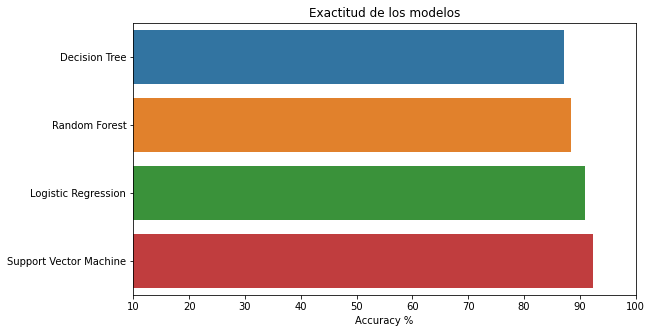

In [44]:
plt.figure(figsize=(9,5))
acc = [metrics.accuracy_score(Y_pred_arbol,y_test),metrics.accuracy_score(Y_pred_bosques,y_test), metrics.accuracy_score(Y_pred_log,y_test), metrics.accuracy_score(Y_pred_vcs,y_test)]
models = ["Decision Tree", "Random Forest", "Logistic Regression", "Support Vector Machine"]
acc_ = np.array(acc)*100
sns.barplot(acc_, models)
plt.title("Exactitud de los modelos")
plt.xlim([10,100])
plt.xlabel("Accuracy %")
plt.show()

### 6. Conclusiones
En conclusión, los modelos tiene una exactitud entre un 87% y 92%. La variable mas significativa es la glucosa en la sangre. Además, a nivel gráfico se puede valorar que el mayor porcentaje con diabetes son mujeres. No obstante, la muestra sigue siendo muy pequeña, además de la falta de variables socieconómicas que nos puden proporcionar mayor información para llegar a conclusiones más significativas sobre el tema de la diabetes.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=eeb74c36-f3dd-4b1e-8914-154c400aca7b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>